# ABS Retail Trade 8501

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    get_meta_constants,
    fix_abs_title,
)
from plotting import (
    # finalise_plot,
    set_chart_dir,
    recalibrate_series,
    clear_chart_dir,
    plot_covid_recovery,
    plot_growth_finalise,
    calc_growth,
)

# pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = 999

# plotting stuff
plt.style.use("fivethirtyeight")

## Get data from the ABS

In [2]:
# get ABS retail data
retail_catalogue_id = "8501"
source, CHART_DIR, META_DATA = get_fs_constants(retail_catalogue_id)
retail_dict = get_ABS_meta_and_data(retail_catalogue_id)
if retail_dict is None:
    sys.exit(-1)
retail_meta = retail_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(retail_meta)
did_col, id_col, table_col, type_col, unit_col = get_meta_constants()

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot - retail turnover by industry

### Plotting initialisation / constants

In [3]:
# clear the old charts
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)

# multi-line the title if might be too long.
LONG_LABEL = 30  # characters

### Main plotting loop

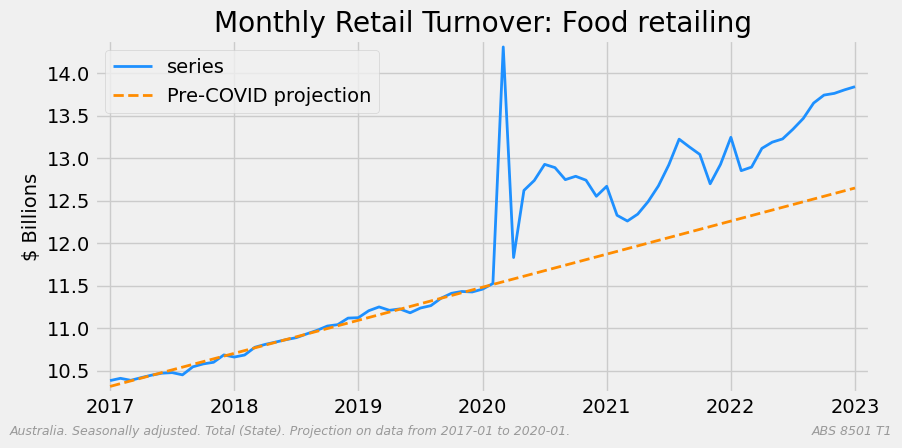

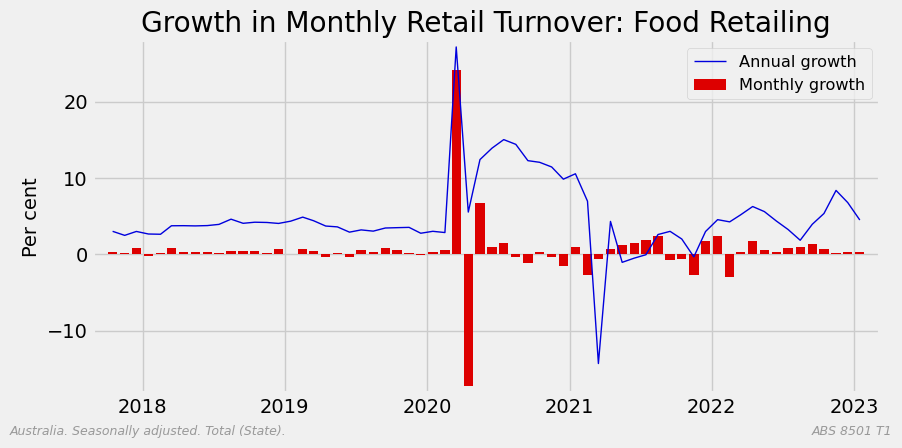

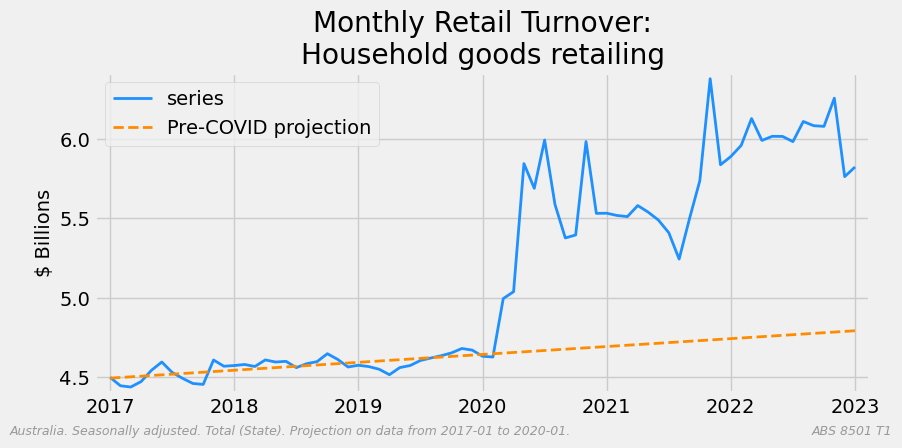

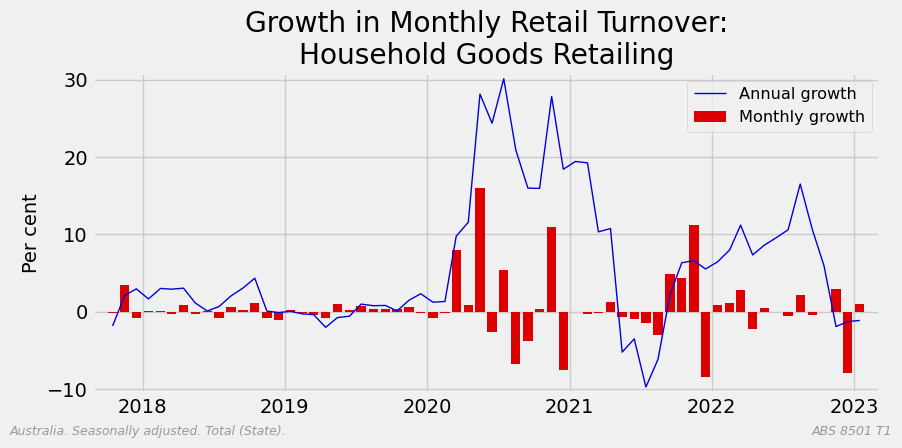

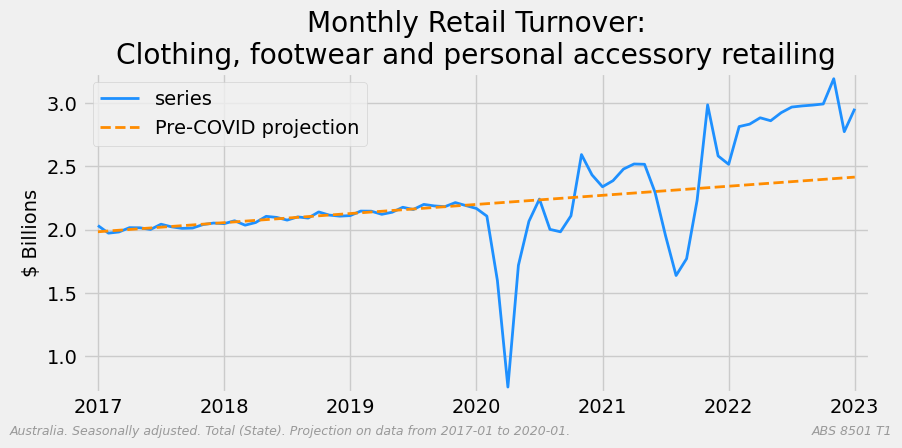

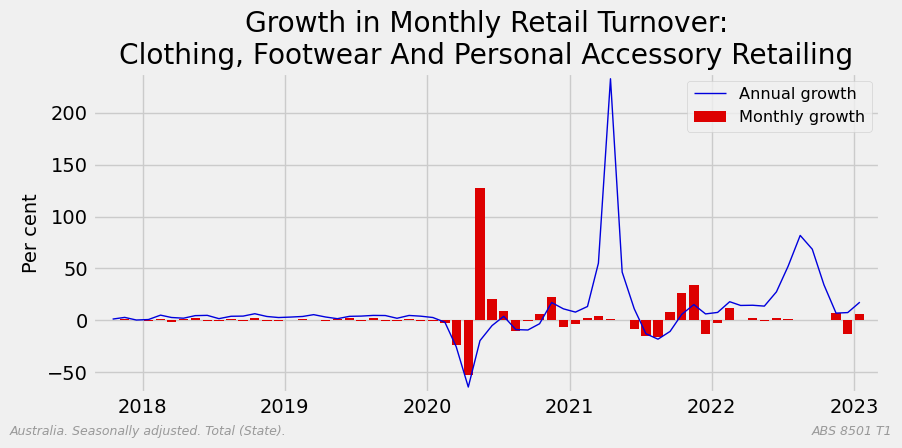

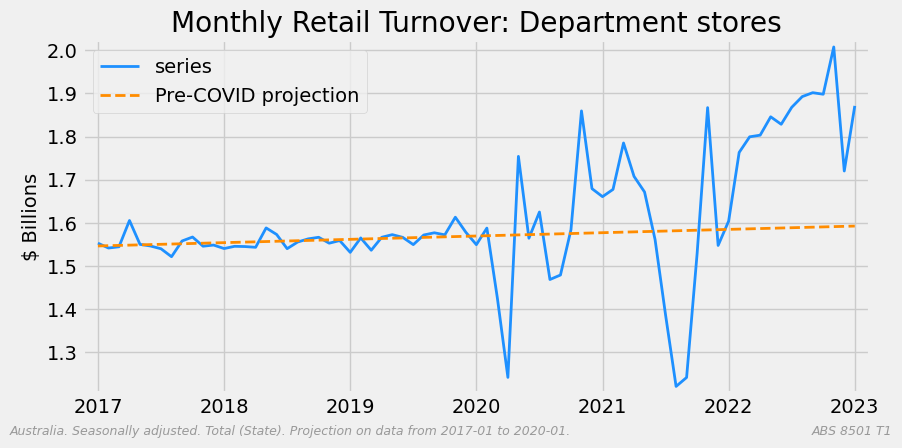

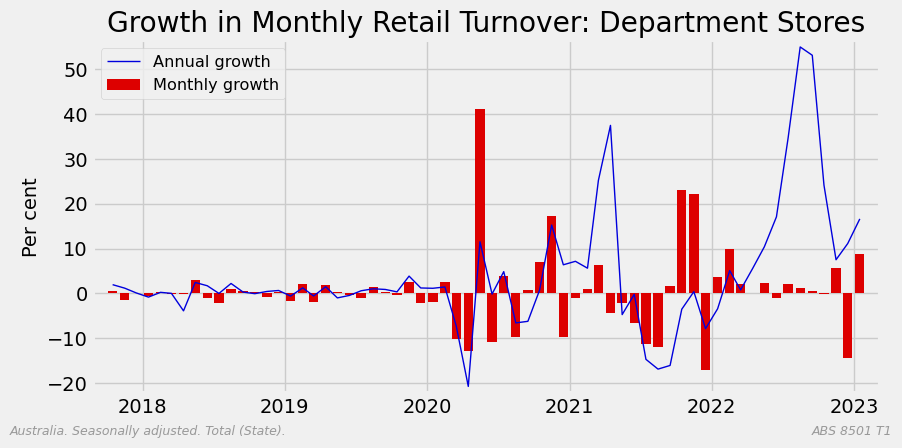

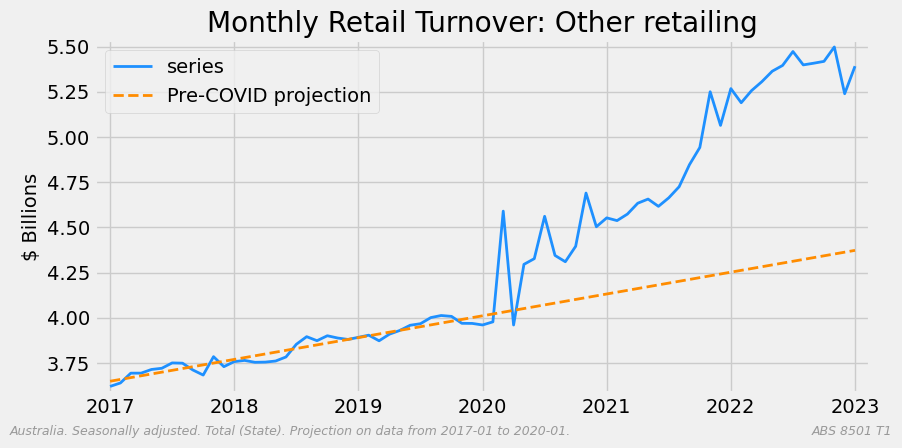

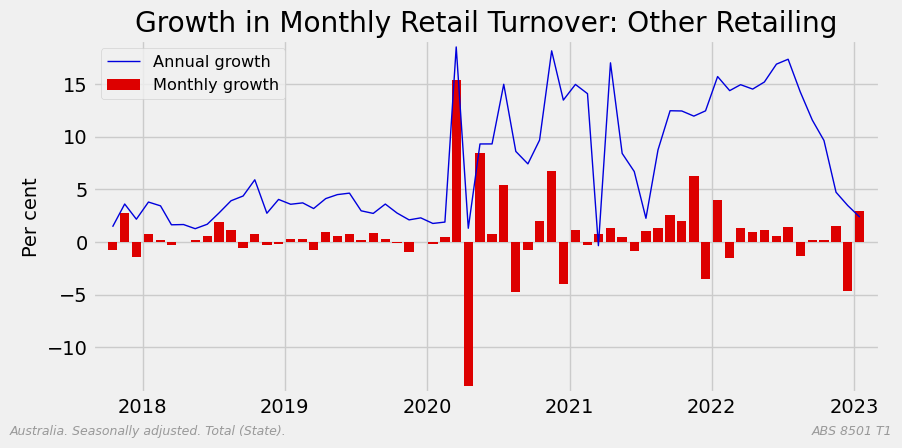

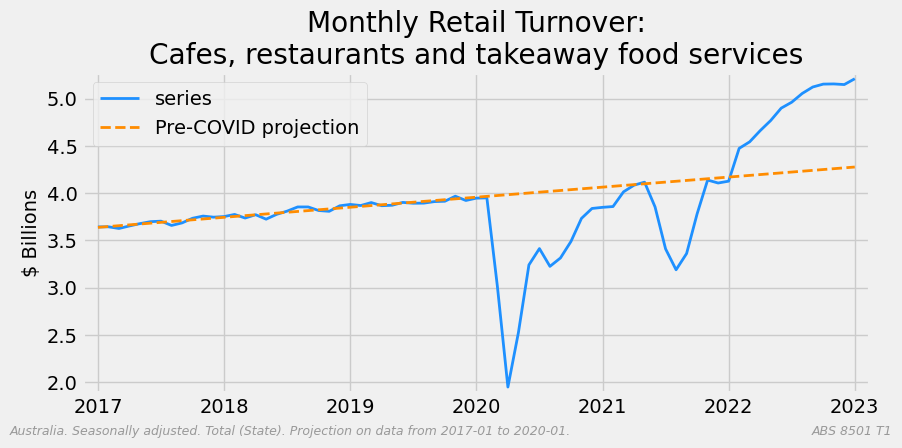

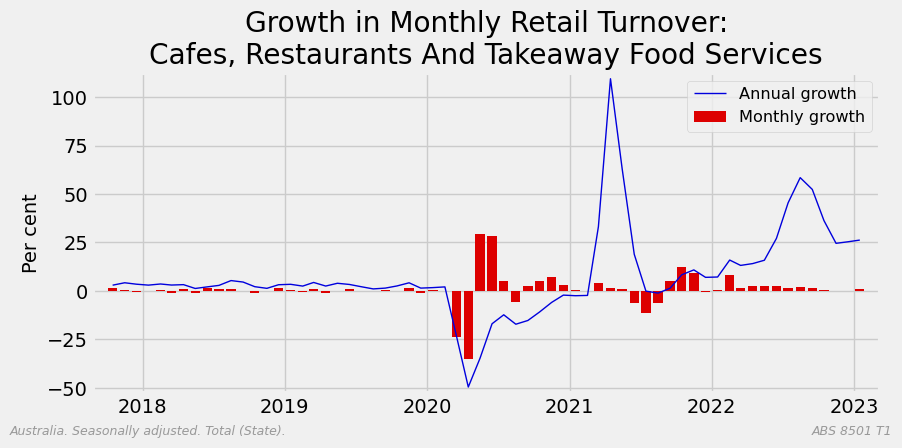

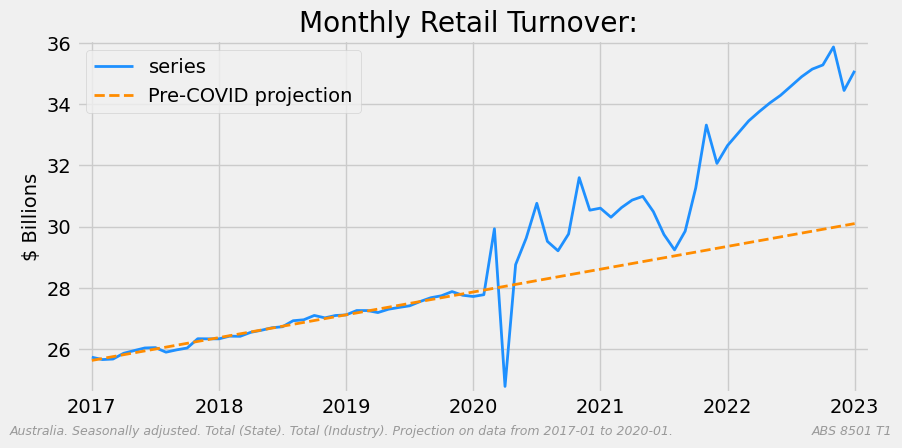

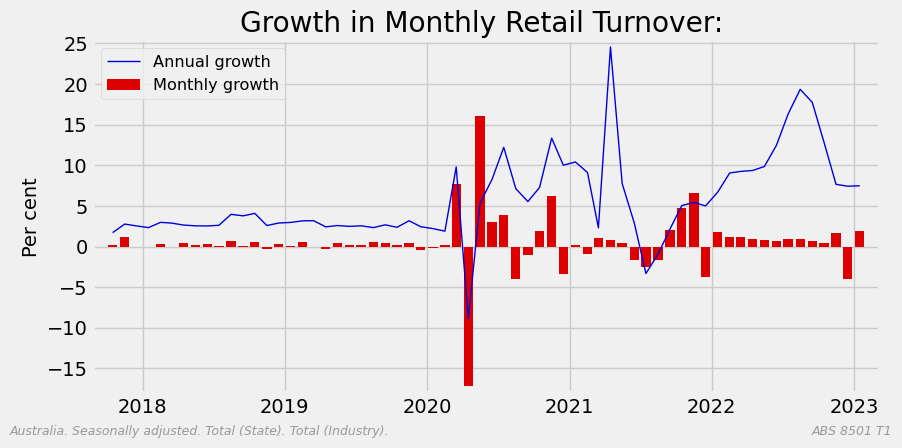

In [4]:
series_type = "Seasonally Adjusted"
rows = retail_meta[
    retail_meta[did_col].str.contains("Turnover", regex="False")
    & retail_meta[unit_col].str.contains("$", regex="False")
    & (retail_meta[type_col] == series_type)
]

recent = plot_times[1]
for index, row in rows.iterrows():
    # get the data for wacg poltable item
    series_id, units, table = row[id_col], row[unit_col], row[table_col]
    data = retail_dict[table]
    series, units = recalibrate_series(data[series_id], units)
    series_freq = series.index.freqstr
    check = pd.Period("2017-01-01", freq=series_freq)
    check_series = series[series.index > check]
    if len(check_series) != len(check_series.dropna()):
        print(f"Odd or missing data: {row[did_col]}")
        continue

    # plot the data
    HEADLINE = "!"
    pre_tag = HEADLINE if table in ["1", "7"] else ""
    series.name = "series"
    frequency = {"Q": "Quarterly", "M": "Monthly"}[series_freq[0]]
    lfooter = f"Australia. {series_type.capitalize()}. "
    title, lfooter = fix_abs_title(row[did_col], lfooter)
    separator = "\n" if len(title) > LONG_LABEL else " "
    title = (
        f"{frequency} Retail Turnover:{separator}"
        f"{title.replace('Turnover', '').strip()}"
    )
    plot_covid_recovery(
        series,
        title=title,
        ylabel=units,
        pre_tag=pre_tag,
        rfooter=f"{source} T{table}",
        lfooter=lfooter,
        show=pre_tag == HEADLINE,
    )

    if pre_tag == HEADLINE:
        # Only do growth charts on headline items
        growth = calc_growth(series)
        plot_growth_finalise(
            *growth,
            from_=pd.Period(recent, freq=series.index.freqstr[0]),
            title=f"Growth in {title.title()}",
            pre_tag=HEADLINE,
            rfooter=f"{source} T{table}",
            lfooter=lfooter,
            show=True,
        )

## Finished

In [5]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Thu Mar 02 2023 06:22:53

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.11.0

sys       : 3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
matplotlib: 3.7.0
pandas    : 1.5.3

Watermark: 2.3.1



In [6]:
print("Finished")

Finished
